# Pymaceuticals Inc.
---

### Analysis

<p><ul><li>Capomulin and Ramicane are the drugs that strongly show the most promise in the trial. The summary statistics indicate significantly better results in terms of average tumour size (both the mean and median) than other drug regimens. Similarly, both drugs produce a less variable set of results, having significantly lower variation than other drugs, and with lower ranges in terms of the statistical deviation of the results from the mean. This is also demonstrated by the interquartile range. Both Capomulin and Ramicane having much smaller ranges than the two other drugs of interest and neither have outliers. Note that Capomulin a skewed result with the median being closer to the 75th percentile than the centre. and that it does not have a normal distribution. This should be considered to determine if the use of the standard deviation is useful.</li></ul></p>
<p><ul><li>A result of interest is that both Capomulin and Ramicane have the largest number of timepoints for all mice tested. This could be indicative of a higher rate of survivability of mice on these drug regimens. This would be an important result if true.</li></ul></p>
</p><ul><li>TWeight is strongly correlated with tumour growth. This result is confined to the Capomulin regimen, it is a result about which we can have confidence, given the high correlation co-efficient of 0.84. this indicates that weight is strongly contraindicated in the treatment of tumours by Capomulin. It would be important to conduct the sae analysis on the other drug regimens, especially Ramicane, and the control group. If the results are consistent across all groups including the control group, then treatment is likely to be more effective combined with weight loss.</li></ul></p>
<p><ul><li>This report does not provide a comprehensive analysis of results. A similar analysis should be undertaken on the other drug regimens, especially those of greatest interest. Within the summary statistical analysis Ramicane performs marginally better than Capomulin, so that drug should be investigated in more depth. Other items to analyse within the results are cancer spread under the different regimens (by number metastatic sites over time), and whether there are statistically significant differences in results by gender (broadly similar proportions of male and female mice were tested).</li></ul></p>
 

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [91]:
#review mouse_metadata to see structure
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [92]:
#review study_results to see structure
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [93]:
# Combine the data into a single dataset
mouse_study_results_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how = 'left' )

# Display the data table for preview
mouse_study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [94]:
# Checking the number of mice.
mouse_study_results_df['Mouse ID'].nunique()

249

In [95]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = mouse_study_results_df[mouse_study_results_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mice_df['Mouse ID'].unique()


array(['g989'], dtype=object)

In [96]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [97]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#g989 has duplicate values with different observations for 'Tumor Volume'. Drop rows for g989 entirely.
#Issues getting the drop_duplicates function to work, instead try .loc - with .loc identifying the indexes 
#with the g989 and returning this as a dataframe and then deleting these from the original dataframe.  

duplicated_results_df = mouse_study_results_df.loc[mouse_study_results_df["Mouse ID"] == 'g989'].index
study_results_clean_df = mouse_study_results_df.drop(duplicated_results_df)
study_results_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [98]:
# Checking the number of mice in the clean DataFrame.

study_results_clean_df['Mouse ID'].nunique()


248

# Summary Statistics

In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_mean = study_results_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summary_stats_df = pd.DataFrame(summary_mean)
summary_stats_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [100]:
summary_median = study_results_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [101]:
summary_median_df = pd.DataFrame(summary_median)
summary_stats_df = pd.merge(summary_stats_df,summary_median_df, on = 'Drug Regimen')


In [102]:
summary_variance = study_results_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [103]:
summary_variance_df = pd.DataFrame(summary_variance)
summary_stats_df = pd.merge(summary_stats_df,summary_variance, on = 'Drug Regimen')
summary_stats_df = summary_stats_df.rename(columns={'Tumor Volume (mm3)_x':'Mean Tumor Volume',
                                                                  'Tumor Volume (mm3)_y':'Median Tumor Volume',
                                                                  'Tumor Volume (mm3)':'Tumor Volume Variance'})


In [104]:
summary_st_deviation = study_results_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_st_deviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [105]:
summary_st_deviation = pd.DataFrame(summary_st_deviation)
summary_stats_df = pd.merge(summary_stats_df,summary_st_deviation, on = 'Drug Regimen')
summary_stats_df = summary_stats_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Dev.'})
                                                                  
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [106]:

summary_sem = study_results_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [107]:
# Assemble the resulting series into a single summary DataFrame.
summary_sem = pd.DataFrame(summary_sem)
summary_stats_df = pd.merge(summary_stats_df,summary_sem, on = 'Drug Regimen')
summary_stats_df = summary_stats_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Err.'})
                                                                  
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [108]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

study_summary_df = study_results_clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

study_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

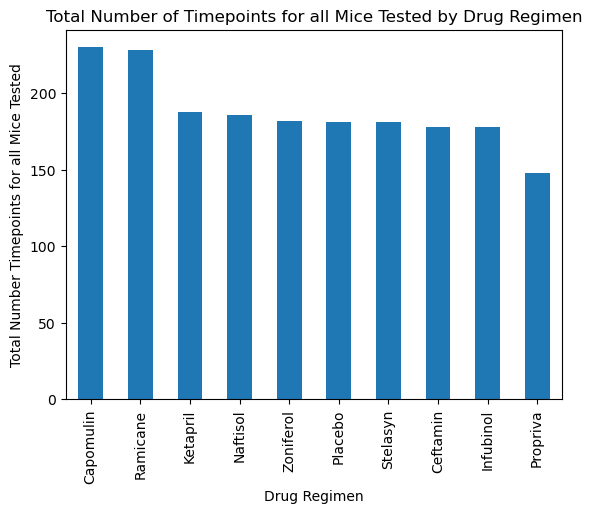

In [109]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#produce a dataframe for calculating the plot. mouse ID column gives nubmer of times 
timepoints_by_mouse = study_results_clean_df.groupby('Drug Regimen')['Mouse ID'].count()
#put list into DataFrame
bar_chart_timepoints_df = pd.DataFrame(timepoints_by_mouse)

#sort the data frame in descending order for purposes of display on bar_chart
bar_chart_timepoints_df = bar_chart_timepoints_df.sort_values('Mouse ID', ascending = False)

#create bar_chart
bar_chart_timepoints_df.plot(kind ='bar', legend=False, align='center', title='Total Number of Timepoints for all Mice Tested by Drug Regimen', \
                             xlabel = 'Drug Regimen', ylabel = 'Total Number Timepoints for all Mice Tested')

plt.show()

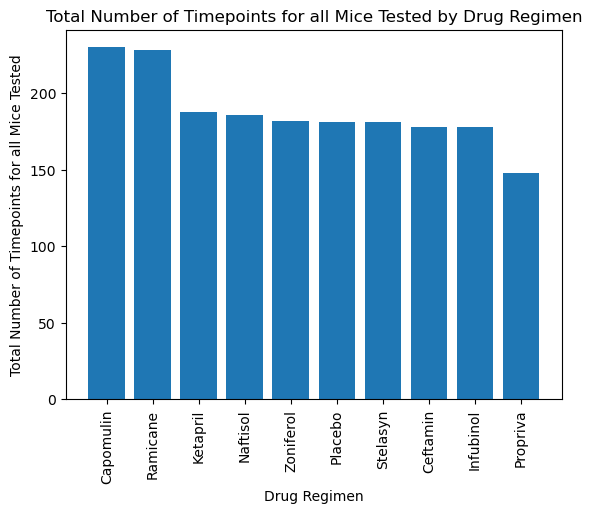

In [110]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_by_mouse = study_results_clean_df.groupby('Drug Regimen')['Mouse ID'].size().reset_index(name = 'count')

timepoints_by_mouse = timepoints_by_mouse.sort_values('count', ascending = False)


plt.bar(x=timepoints_by_mouse['Drug Regimen'], height =timepoints_by_mouse['count'],  )
plt.title("Total Number of Timepoints for all Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints for all Mice Tested")
plt.xticks(rotation = 90)
plt.show()






In [111]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Create a dataframe of mice by gender
test_mouse_gender = study_results_clean_df.groupby(['Sex']).count()
test_mouse_gender

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


Text(0, 0.5, 'Sex')

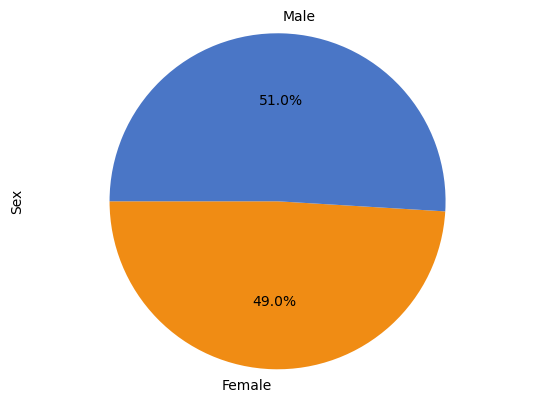

In [112]:
sex = ["female", "male"]
test_mouse_gender_df = pd.DataFrame(test_mouse_gender)
total_pie=test_mouse_gender_df.plot(kind='pie', y='Mouse ID', legend = False, autopct = "%1.1f%%", colors = ("#F08C14", "#4A76C6"), startangle = 180 )
plt.axis("equal")
total_pie.set_ylabel("Sex")

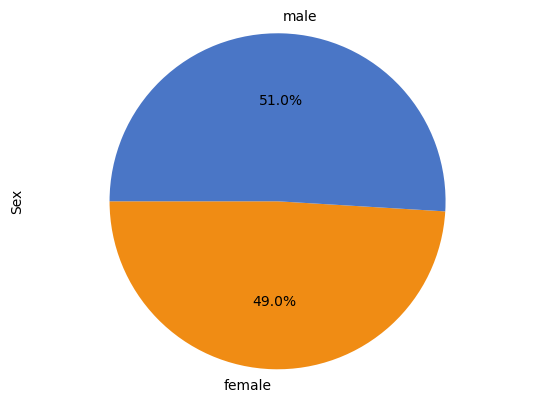

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = ["female", "male"]
plt.pie(test_mouse_gender["Mouse ID"], labels = sex, autopct = "%1.1f%%", colors = ("#F08C14", "#4A76C6"), startangle = 180 )
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [114]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and 'Ceftamin'

#Filter for Drug regimens
study_results_clean_df
target_teatments =['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
treatments_filtered_df = study_results_clean_df[study_results_clean_df['Drug Regimen'].isin(target_teatments)]


In [115]:
#Filter original database for for Drug Regimens

target_teatments =['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
treatments_filtered_df = study_results_clean_df[study_results_clean_df['Drug Regimen'].isin(target_teatments)]

# Getting the last (greatest) timepoint for each mouse using the original DataFrame

tumor_vol_df = study_results_clean_df.loc[study_results_clean_df.groupby('Mouse ID')['Timepoint'].idxmax(), :].reset_index()
tumor_vol_df



,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1804,a203,45,67.973419,2,Infubinol,Female,20,23
1,1786,a251,45,65.525743,1,Infubinol,Female,21,25
2,1783,a262,45,70.717621,4,Placebo,Female,17,29
3,1856,a275,45,62.999356,3,Ceftamin,Female,20,28
4,1401,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...,...
243,499,z435,10,48.710661,0,Propriva,Female,12,26
244,1799,z578,45,30.638696,0,Ramicane,Male,11,16
245,1784,z581,45,62.754451,3,Infubinol,Female,24,25
246,1887,z795,45,65.741070,3,Naftisol,Female,13,29


In [116]:
#Filter for Drug regimens and createa subset

study_results_clean_df
mask = tumor_vol_df["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
target_drugs_final_result_df = tumor_vol_df.loc[mask]

#sort tableby the Drug regimens and rename columns 
target_drugs_final_result_df = target_drugs_final_result_df.sort_values(
    ["Drug Regimen"]).reset_index(drop = True)
target_drugs_final_result_df=target_drugs_final_result_df.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume (mm3)",\
                                                                         "Timepoint":"Final Timepoint"})
max_tumor_vol_by_drug_df = target_drugs_final_result_df.drop(columns=['index', 'Final Timepoint' ])
max_tumor_vol_by_drug_df =  max_tumor_vol_by_drug_df[['Drug Regimen','Final Tumor Volume (mm3)', 'Mouse ID','Metastatic Sites',\
                                                     'Sex','Age_months','Weight (g)']]
max_tumor_vol_by_drug_df 

,Drug Regimen,Final Tumor Volume (mm3),Mouse ID,Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,38.846876,l897,1,Male,17,19
1,Capomulin,38.125164,j119,1,Female,7,23
2,Capomulin,38.753265,j246,1,Female,21,21
3,Capomulin,31.023923,u364,3,Male,18,17
4,Capomulin,40.159220,g316,2,Female,22,22
...,...,...,...,...,...,...,...
95,Ramicane,31.560470,j913,1,Female,4,17
96,Ramicane,36.134852,j989,1,Male,8,19
97,Ramicane,22.050126,k403,1,Male,21,16
98,Ramicane,30.564625,m546,1,Male,18,16


In [117]:
#drug_types types of interest - list
target_drug = max_tumor_vol_by_drug_df ['Drug Regimen'].unique()

#create the dataframe to produce the IQR analysis. Do this by using the list "target_drug" to give me the columnsto search
target_drug_df = pd.DataFrame(columns = target_drug)
target_drug_df

#Set up a loop to fill the dataframe (target_drug_df) with the final volume of the tumours for each drug 
#for the purposes of the analysis. An alternative way of doing this would be to use a pivot_table function with 
#the columns set to the drugs we want. Either would work on the sorted dataframe above or on the original dataframe with 
#all the drugs included.
for drug in target_drug:
    final_volume = max_tumor_vol_by_drug_df[max_tumor_vol_by_drug_df["Drug Regimen"]== drug]["Final Tumor Volume (mm3)"]
    target_drug_df[drug] = final_volume.tolist()
    
target_drug_df   
    


,Capomulin,Ceftamin,Infubinol,Ramicane
0,38.846876,64.192341,50.005138,30.276232
1,38.125164,61.849023,55.650681,38.407618
2,38.753265,46.784535,51.542431,43.047543
3,31.023923,68.923185,54.048608,44.183451
4,40.159220,64.299830,67.685569,38.810366
5,37.074024,59.851956,46.250112,31.095335
6,30.485985,67.748662,54.656549,32.978522
7,34.455298,45.000000,58.268442,45.220869
8,40.728578,57.918381,67.973419,36.561652
9,40.658124,47.784682,55.629428,43.166373


In [118]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. idy up our results y formatting them to make them more readable

#Capomulin
quartiles = target_drug_df['Capomulin'].quantile([.25,.5,.75])
cap_lowerq = quartiles[0.25]
cap_upperq = quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
cap_lower_bound = cap_lower_bound


#Ceftamin
quartiles = target_drug_df['Ceftamin'].quantile([.25,.5,.75])
ce_lowerq = quartiles[0.25]
ce_upperq = quartiles[0.75]
ce_iqr = ce_upperq-ce_lowerq
ce_lower_bound = ce_lowerq - (1.5*ce_iqr)
ce_upper_bound = ce_upperq + (1.5*ce_iqr)
ce_iqr  

#Infubinol
quartiles = target_drug_df['Infubinol'].quantile([.25,.5,.75])
i_lowerq = quartiles[0.25]
i_upperq = quartiles[0.75]
i_iqr = i_upperq-i_lowerq
i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)
i_iqr

#Ramicane
quartiles = target_drug_df['Ramicane'].quantile([.25,.5,.75])
r_lowerq = quartiles[0.25]
r_upperq = quartiles[0.75]
r_iqr = r_upperq-r_lowerq
r_lower_bound = r_lowerq - (1.5*r_iqr )
r_upper_bound =r_upperq + (1.5*r_iqr )
r_iqr  



print(f"Capomulin's potential outliers will be below \033[1m{cap_lower_bound:.3f}\033[0m and above \033[1m{cap_upper_bound:.3f}\033[0m volume mm3.")
print(f"Ceftamin's potential outliers will be below \033[1m{ce_lower_bound:.3f}\033[0m and above \033[1m{ce_upper_bound:.3f}\033[0m volume mm3.")
print(f"Infubinol's potential outliers will be below \033[1m{i_lower_bound:.3f}\033[0m and above \033[1m{i_upper_bound:.3f}\033[0m volume mm3.")
print(f"Ramicane's potential outliers will be below \033[1m{r_lower_bound:.3f}\033[0m and above \033[1m{r_upper_bound:.3f}\033[0m volume mm3.")


Capomulin's potential outliers will be below 20.705 and above 51.832 volume mm3.
Ceftamin's potential outliers will be below 25.355 and above 87.666 volume mm3.
Infubinol's potential outliers will be below 36.833 and above 82.741 volume mm3.
Ramicane's potential outliers will be below 17.913 and above 54.307 volume mm3.


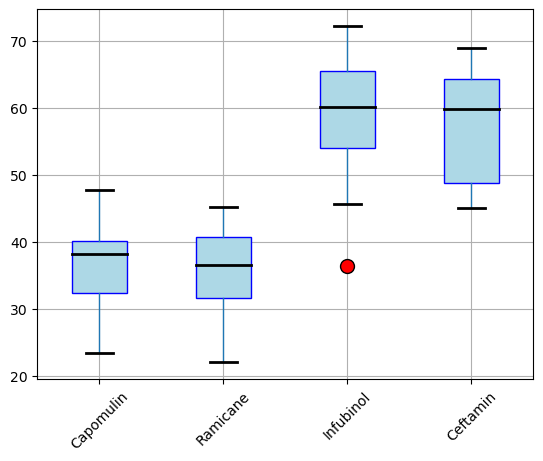

In [119]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot = target_drug_df.boxplot(column=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'], rot=45,\
                                patch_artist = True, boxprops = dict(facecolor = 'lightblue', color = 'blue'),\
                                capprops = dict(color = 'black', linewidth=2), flierprops = dict(marker = 'o', markerfacecolor='red', markersize=10),\
                                medianprops = dict(color = 'black', linewidth=2))  


## Line and Scatter Plots

In [120]:
###############################################################################################
#Note, I have selected a mouse using the random function. This was to ensure no bias in the selectin of the mouse
#to graph (and because it was a bit of fun); however, this means that each time the code is run it selects a new mouse.
#The grph is formatted to name the mouse formatted. Recognise that if this analysis was for a client, this might not be 
#desirable.
###############################################################################################

import random
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Select a all results for Capomulin from the original clean dataframe (to restore all timepoints).
capomulin_results_df = study_results_clean_df[(study_results_clean_df["Drug Regimen"]=='Capomulin')]

#select a random mouse from the test subjects. I have used the random module to allow this to occur, \
#rather than select a mouse
mouse_numbers = list(capomulin_results_df['Mouse ID'].unique())
random_mouse_number = random.choice(mouse_numbers)
capomulin_results_by_mouse = capomulin_results_df[(capomulin_results_df['Mouse ID']==random_mouse_number)]
capomulin_results_by_mouse 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
249,m601,0,45.000000,0,Capomulin,Male,22,17
312,m601,5,41.408591,1,Capomulin,Male,22,17
606,m601,10,36.825367,1,Capomulin,Male,22,17
870,m601,15,35.464612,1,Capomulin,Male,22,17
1089,m601,20,34.255732,1,Capomulin,Male,22,17
1185,m601,25,33.118756,1,Capomulin,Male,22,17
1359,m601,30,31.758275,1,Capomulin,Male,22,17
1512,m601,35,30.834357,1,Capomulin,Male,22,17
1656,m601,40,31.378045,1,Capomulin,Male,22,17
1843,m601,45,28.430964,1,Capomulin,Male,22,17


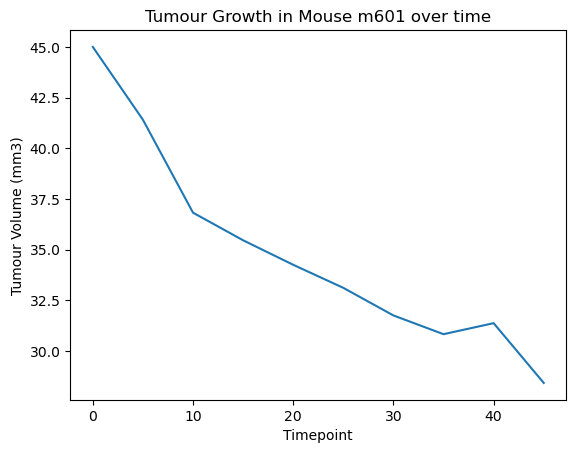

In [121]:
plt.plot(capomulin_results_by_mouse['Timepoint'],capomulin_results_by_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumour Volume (mm3)')
plt.title(f'Tumour Growth in Mouse {random_mouse_number} over time')
plt.show()

In [122]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Use dataframe created above for all mice given Capomulin by timepoints
capomulin_results_df
#Calulculate average tumour size by mouse ID for Capomulin
av_tumor_size_capomulin = capomulin_results_df.groupby(('Mouse ID'))
av_size_weight_capomulin = av_tumor_size_capomulin.agg({'Tumor Volume (mm3)':'mean', 'Weight (g)': 'first'})
#av_tumor_size_capomulin_df = pd.DataFrame(average_tumor_size_capomulin)
av_size_weight_capomulin
#summary_variance = study_results_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']


,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


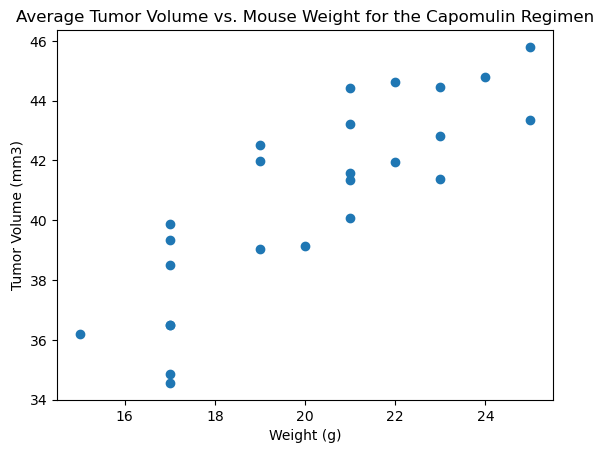

In [123]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(av_size_weight_capomulin.iloc[:,1],av_size_weight_capomulin.iloc[:,0])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.show()

## Correlation and Regression

The correlation between mouse wieght and the average tumour volumne is 0.84


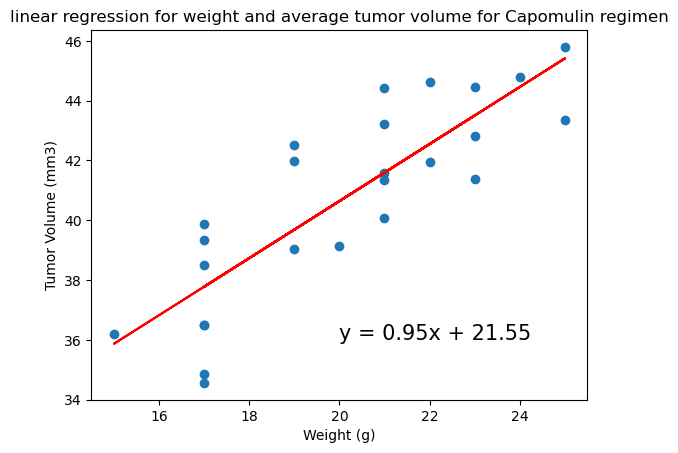

In [124]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#To be able to use the lineregress function in SciPy, need to import linregress.
#All class actvities use this function, so I have imported it for this element of the assignment. 

from scipy.stats import linregress

x_values = av_size_weight_capomulin['Weight (g)']
y_values = av_size_weight_capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="black")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('linear regression for weight and average tumor volume for Capomulin regimen')
print (f'The correlation between mouse wieght and the average tumour volumne is {round(rvalue,2)}')
